In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%pwd

'C:\\python\\miniproject'

In [3]:
%cd ../datas

C:\python\datas


In [4]:
#!pip install easydict

# Global Variables

In [5]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = './'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission_0220.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

In [6]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
end = pd.read_csv(args.default_submission_csv)

ori_train.shape, ori_test.shape, end.shape

((916, 12), (393, 11), (393, 2))

In [7]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [8]:
ori_test.set_index(['passengerid'], inplace=True) 

In [9]:
new_survived = pd.Categorical(ori_train["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


# train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [12]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

In [13]:
ori_train2 = pd.concat([X_tr,y_tr],axis=1) ##상관간계를 보기 위해 스플릿시킨 데이터들을 합쳐 줌

In [14]:
ori_train2

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,survived
812,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,1
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q,0
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S,1
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0
203,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
273,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S,1
343,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q,1
450,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,17475,26.5500,NaN,S,0
94,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0


In [15]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

# cabin, ticket 제거

In [16]:
print(f'before: {train.shape} / {test.shape}')
drop_cols = ['ticket', 'cabin']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
ori_te.drop(drop_cols, axis=1, inplace=True)
print(f'after: {train.shape} / {test.shape}')
train.info()

before: (641, 10) / (275, 10)
after: (641, 8) / (275, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       512 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   fare      641 non-null    float64
 7   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 45.1+ KB


In [17]:
train[train['fare']<=0]

,pclass,name,gender,age,sibsp,parch,fare,embarked
54,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0,S
715,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,S
20,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,0.0,S
158,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S
806,1,"Fry, Mr. Richard",male,NaN,0,0,0.0,S
500,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S
702,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0,S
33,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0,S
357,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,S


In [18]:
train

,pclass,name,gender,age,sibsp,parch,fare,embarked
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
273,2,"Davis, Miss. Mary",female,28.0,0,0,13.0000,S
343,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,7.7500,Q
450,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,26.5500,S
94,3,"Panula, Master. Urho Abraham",male,2.0,4,1,39.6875,S


In [19]:
train.columns = [col.lower() for col in train.columns] # 컬럼명 소문자로 변환
train.columns

Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

# 결측치 확인

In [20]:
train.isnull().sum()

pclass        0
name          0
gender        0
age         129
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [21]:
test.isnull().sum()

pclass       0
name         0
gender       0
age         51
sibsp        0
parch        0
fare         0
embarked     1
dtype: int64

In [22]:
ori_te.isnull().sum()

pclass       0
name         0
gender       0
age         83
sibsp        0
parch        0
fare         1
embarked     1
dtype: int64

## 결측치 median으로 채워줌

In [23]:
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]
age_median = train['age'].median()
fare_median, embarked_mode,age_median


(14.4, 'S', 28.0)

In [24]:
train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

fare_median, embarked_mode
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

### 이름에서 띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열을 추출
### 영어 호칭이 추출됨.

In [25]:
train['designation'] = train['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['designation'] = test['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
ori_te['designation'] = ori_te['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations

train.drop(['name'], axis=1, inplace=True)
test.drop(['name'], axis=1, inplace=True)
ori_te.drop(['name'], axis=1, inplace=True)

In [26]:
train['designation'].unique()

array(['Miss', 'Mr', 'Mrs', 'Master', 'Dr', 'Rev', 'Capt', 'Mlle', 'Ms',
       'Col', 'Major', 'Sir', 'Jonkheer'], dtype=object)

In [27]:
train['designation'].value_counts() 

Mr          370
Miss        126
Mrs         106
Master       22
Rev           4
Dr            3
Col           3
Major         2
Capt          1
Mlle          1
Ms            1
Sir           1
Jonkheer      1
Name: designation, dtype: int64

### 나눴던 추출한 호칭들을 3개의 컬럼으로 재변형

In [28]:
dict_initial_name = {
    'Mr': 'Others',
    'Miss': 'Others',
    'Mrs': 'Others',

    'Master': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',

    'Jonkheer': 'Royalty',
    'Countess': 'Royalty',
    'Sir': 'Royalty'
}

def add_initial_name_type(initial_name):
  result = 'Others'
  try:
    result = dict_initial_name[initial_name]
  except:
    pass 
  return result

train['Initial_name_type'] = train['designation'].map(lambda x: add_initial_name_type(x))
test['Initial_name_type'] = test['designation'].map(lambda x: add_initial_name_type(x))
ori_te['Initial_name_type'] = ori_te['designation'].map(lambda x: add_initial_name_type(x))

train.drop(['designation'], axis=1, inplace=True)
test.drop(['designation'], axis=1, inplace=True)
ori_te.drop(['designation'], axis=1, inplace=True)

print(f'Initial_name_type: {train["Initial_name_type"].isnull().sum()} / {test["Initial_name_type"].isnull().sum()} / {ori_te["Initial_name_type"].isnull().sum()}')

Initial_name_type: 0 / 0 / 0


### age를 나이대 별로 카테고리화 시켜줌

In [29]:
#bins = [0, 20, 30, 50, 70, 100]
bins = [-1, 5, 20, 30, 40, 50, 60, 70, 81]
labels = ["애기","미성년자", "청년", "중청년", "장년", "중장년", "중년", "노년"]
# labels = ["애기", "미성년자", "청년", "중년", "노년"]
train["age_num"] = pd.cut(train.age, bins, labels=labels)
test["age_num"] = pd.cut(test.age, bins, labels=labels)
ori_te["age_num"] = pd.cut(ori_te.age, bins, labels=labels)

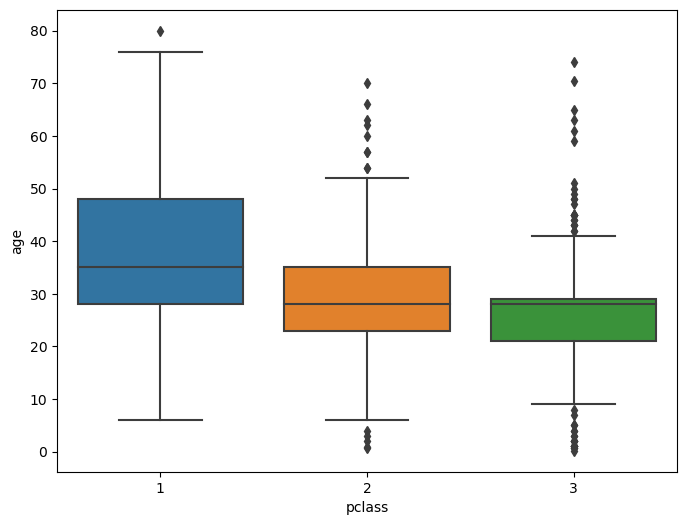

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='pclass', y="age", data=train)

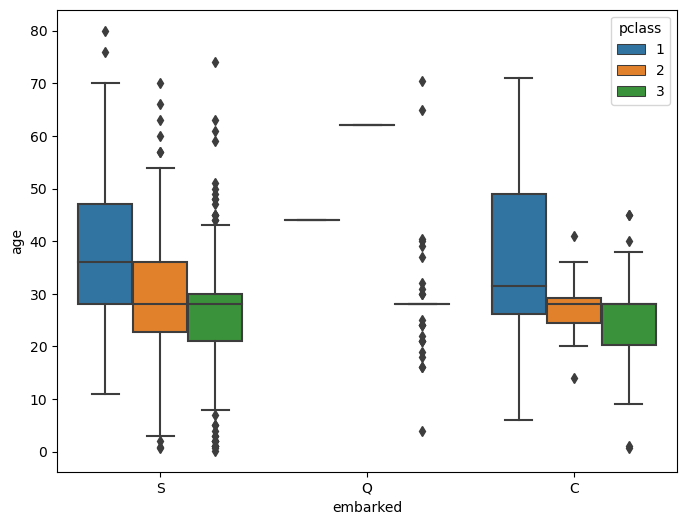

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="age",hue='pclass', data=train)

### 클래스가 가장 낮은 3등급 인원이 가장많고 3등급인 사람의 생존률이 가장 낮음

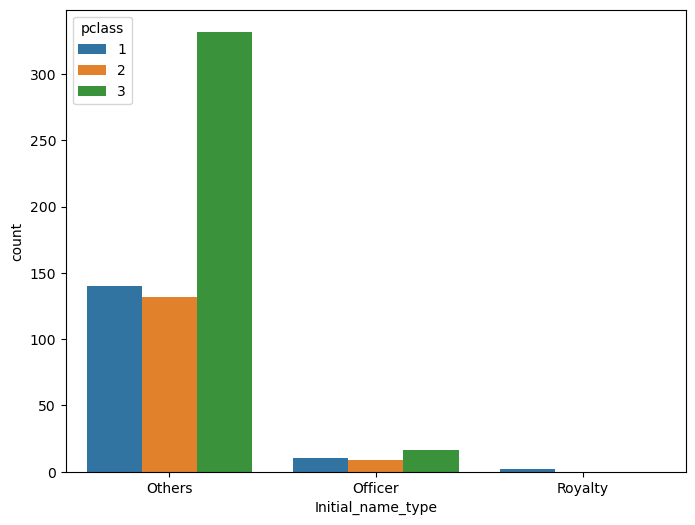

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.countplot(x='Initial_name_type', hue="pclass", data=train)

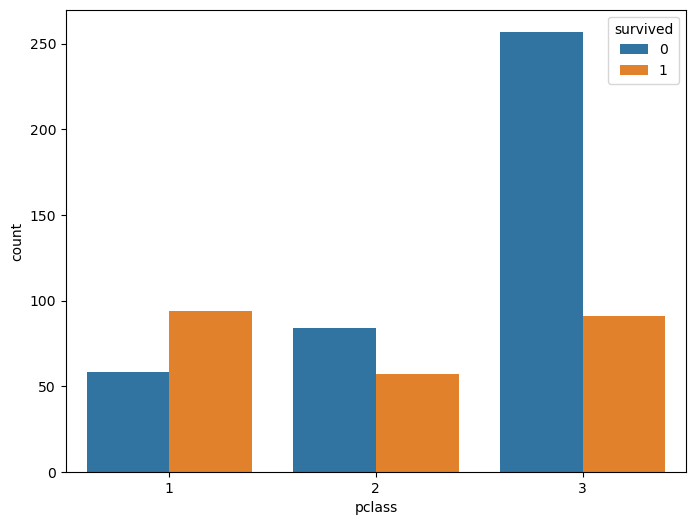

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.countplot(x='pclass', hue="survived", data=ori_train2)

### ---age결측치를 채우기위해 고안한 첫번째방법---
### embarked에서 pclass를 나누어서 클래스별 나이대를 찾아봄.
### 클래스별 나이대 median으로 생성
### 결론 : 내가 나눴던 방법보다 위에서 사용한 전체에대한 median값을 넣은게 더 점수가 잘나옴

In [34]:
# a=[]
# def emb(embar):
#     for i in range(1,4):
#         cond = train['age'].isnull() & (train['pclass']==i) & (train['embarked']==embar)
#         cond2 = train['age'].notnull() & (train['pclass']==i) & (train['embarked']==embar)
#         #ages = round(train[cond2]['age'].mean(),0)
#         ages = round(train[cond2]['age'].median(),0)
#         #ages = round(train[cond2]['age'].mode()[0],0)
#         a.append(ages)
#         # train1[cond]['hasAge'].fillna(np.mean(train1[train1['age'].notnull() & (train1['pclass']==i) & (train1['embarked']==embar)]['age']))
#         #train1[cond]['age'].fillna(np.mean(train1[train1['age'].notnull() & (train1['pclass']==i) & (train1['embarked']==embar)]['age']))
#         train.loc[((train['pclass']==i) & (train['embarked']==embar)), 'age'] = ages
# emb("C")
# emb("Q")
# emb("S")
# train['age'].isnull().sum()

In [35]:
# def emb(embar):
#     for i in range(1,4):
#         cond = test['age'].isnull() & (test['pclass']==i) & (test['embarked']==embar)
#         cond2 = test['age'].notnull() & (test['pclass']==i) & (test['embarked']==embar)
#         #ages = round(test[cond2]['age'].mean(),0)
#         if embar == "C":
#             test.loc[((test['pclass']==i) & (test['embarked']==embar)), 'age'] = a[i-1]
#         elif embar == "Q":
#             test.loc[((test['pclass']==i) & (test['embarked']==embar)), 'age'] = a[i+2]
#         elif embar == "S":
#             test.loc[((test['pclass']==i) & (test['embarked']==embar)), 'age'] = a[i+5]
# emb("C")
# emb("Q")
# emb("S")
# test

In [36]:
# def emb(embar):
#     for i in range(1,4):
#         cond = ori_te['age'].isnull() & (ori_te['pclass']==i) & (ori_te['embarked']==embar)
#         cond2 = ori_te['age'].notnull() & (ori_te['pclass']==i) & (ori_te['embarked']==embar)
#         #ages = round(test[cond2]['age'].mean(),0)
#         if embar == "C":
#             ori_te.loc[((ori_te['pclass']==i) & (ori_te['embarked']==embar)), 'age'] = a[i-1]
#         elif embar == "Q":
#             ori_te.loc[((ori_te['pclass']==i) & (ori_te['embarked']==embar)), 'age'] = a[i+2]
#         elif embar == "S":
#             ori_te.loc[((ori_te['pclass']==i) & (ori_te['embarked']==embar)), 'age'] = a[i+5]
# emb("C")
# emb("Q")
# emb("S")
# ori_te

In [37]:
ori_te["age"].isnull().sum()

0

In [38]:
ori_te[ori_te['fare'].isnull()]

,pclass,gender,age,sibsp,parch,fare,embarked,Initial_name_type,age_num
passengerid,,,,,,,,,


### fare 값을 카테고리화 시켜줌

In [39]:
bins = [-1, 12.5, 25, 37.5 , 50, 62.5, 75, 87.5 ,100, 112.5, 125, 137.5 , 150, 162.5, 175, 187.5 ,200, 212.5, 225, 237.5 , 250, 262.5, 275, 287.5 ,300,400,500,600]

labels = ["저렴1", "저렴2","저렴3", "저렴4", "저렴5", "저렴6","저렴7",'저렴8'
          ,'중간1','중간2','중간3','중간4','중간5','중간6','중간7','중간8'
          ,'중상1','중상2','중상3','중상4','중상5','중상6','중상7','중상8'
          ,'vip','vvip','vvvip']
train["fare_label"] = pd.cut(train.fare, bins, labels=labels)
test["fare_label"] = pd.cut(test.fare, bins, labels=labels)
ori_te["fare_label"] = pd.cut(ori_te.fare, bins, labels=labels)

In [40]:
# cabin을 살려뒀을때 케빈의 값이 들어있는 경우가 생존확률이 높았어서 이전에 cabin값이 있으면 0 없으면 1 로 바꿔놨던 값을 
# onehotencoder를 돌리려고 low high로 변경시켜준것. 


# train['cabin_percent'] = train['cabin'].map(lambda x: 'low' if x==0 else 'high')
# test['cabin_percent'] = test['cabin'].map(lambda x: 'low' if x==0 else 'high')
# ori_te['cabin_percent'] = ori_te['cabin'].map(lambda x: 'low' if x==0 else 'high')

In [41]:
train

,pclass,gender,age,sibsp,parch,fare,embarked,Initial_name_type,age_num,fare_label
812,3,female,22.0,0,0,7.7750,S,Others,청년,저렴1
134,3,male,21.0,0,0,7.8208,Q,Others,청년,저렴1
390,3,male,32.0,0,0,7.8542,S,Others,중청년,저렴1
305,3,male,11.0,0,0,18.7875,C,Others,미성년자,저렴2
203,3,male,30.0,0,0,8.0500,S,Others,청년,저렴1
...,...,...,...,...,...,...,...,...,...,...
273,2,female,28.0,0,0,13.0000,S,Others,청년,저렴2
343,3,female,24.0,0,0,7.7500,Q,Others,청년,저렴1
450,1,male,42.0,0,0,26.5500,S,Others,장년,저렴3
94,3,male,2.0,4,1,39.6875,S,Officer,애기,저렴4


### 요금별로 성별을 확인하고, 생존률을 확인
### 성별과 요금을 묶어서 피켜생성

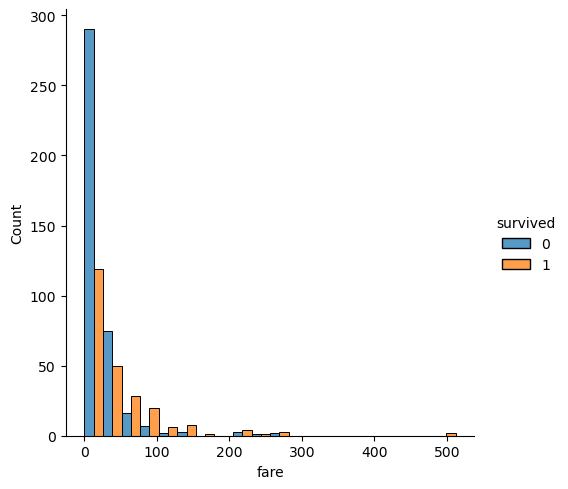

In [42]:
sns.displot(ori_train2,x='fare',hue='survived',multiple="dodge", bins=20)

In [ ]:
sns.displot(ori_train2,x='fare',hue='gender')

In [ ]:
train['gender_fare'] = train.apply(lambda row: row['gender']+'_'+str(row['fare_label']), axis=1)
test['gender_fare'] = test.apply(lambda row: row['gender']+'_'+str(row['fare_label']), axis=1)
ori_te['gender_fare'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['fare_label']), axis=1)

print(f"{train['gender_fare'].nunique()} / \n {train['gender_fare'].unique()} \n")
train.shape, test.shape, ori_te.shape

### 성별별 sibsp와 생종률을 확인
### 여성이 더 많이 생존 한 것을 확인
### 성별과 sibsp를 묶어서 피쳐생성

In [ ]:
sns.displot(ori_train2,x='sibsp',hue='survived',multiple="dodge", bins=20)

In [ ]:
sns.displot(ori_train2,x='sibsp',hue='gender',multiple="dodge", bins=20)

In [ ]:
sns.barplot(data = ori_train2, x = 'sibsp',y = 'survived',hue = 'gender')

In [ ]:
train['gender_sibsp'] = train.apply(lambda row: row['gender']+'_sibsp'+str(row['sibsp']), axis=1)
test['gender_sibsp'] = test.apply(lambda row: row['gender']+'_sibsp'+str(row['sibsp']), axis=1)
ori_te['gender_sibsp'] = ori_te.apply(lambda row: row['gender']+'_sibsp'+str(row['sibsp']), axis=1)

print(f"{train['gender_sibsp'].nunique()} / \n {train['gender_sibsp'].unique()} \n")
train.shape, test.shape, ori_te.shape

### 성별별 pclass와 생존률을 확인
### pclass1이 더 많이 생존 한 것을 확인
### 성별과 pclass를 묶어서 피쳐생성

In [ ]:
sns.displot(ori_train2,x='gender',hue='pclass',multiple="dodge", bins=20)

In [ ]:
sns.displot(ori_train2,x='pclass',hue='survived',multiple="dodge", bins=20)

In [ ]:
sns.barplot(data = ori_train2, x = 'gender',y = 'survived',hue = 'pclass')

In [ ]:
train['gender_pclass'] = train.apply(lambda row: row['gender']+'_pclass'+str(row['pclass']), axis=1)
test['gender_pclass'] = test.apply(lambda row: row['gender']+'_pclass'+str(row['pclass']), axis=1)
ori_te['gender_pclass'] = ori_te.apply(lambda row: row['gender']+'_pclass'+str(row['pclass']), axis=1)

print(f"{train['gender_pclass'].nunique()} / \n {train['gender_pclass'].unique()} \n")
train.shape, test.shape, ori_te.shape

In [ ]:
#pclass 1등급의 생존률이 높아서 pclass 1인것은 1 아닌것은 0 으로 피쳐를 만들어보려 했다가 삭제

# train['pclass_class1'] = train.apply(lambda row: 1 if row['pclass'] == 1 else 0, axis=1)
# test['pclass_class1'] = test.apply(lambda row: 1 if row['pclass'] == 1 else 0, axis=1)
# ori_te['pclass_class1'] = ori_te.apply(lambda row: 1 if row['pclass'] == 1 else 0, axis=1)

### 기존 age컬럼으로 생성한 피쳐와 성별을 합침

In [ ]:
train['gender_age_num'] = train.apply(lambda row: row['gender']+'_'+str(row['age_num']), axis=1)
test['gender_age_num'] = test.apply(lambda row: row['gender']+'_'+str(row['age_num']), axis=1)
ori_te['gender_age_num'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['age_num']), axis=1)

In [ ]:
train

### 피쳐생성을 마친 피쳐들을 삭제

In [ ]:
# train.drop(['gender','pclass','age','fare','fare_label','sibsp','parch','pclass_class1','age_num'], axis=1, inplace=True)
# test.drop(['gender','pclass','age','fare','fare_label','sibsp','parch','pclass_class1','age_num'], axis=1, inplace=True)
# ori_te.drop(['gender','pclass','age','fare','fare_label','sibsp','parch','pclass_class1','age_num'], axis=1, inplace=True)
# train.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)
# test.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)
# ori_te.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)
train.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)
test.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)
ori_te.drop(['gender','pclass','sibsp','parch','age_num'], axis=1, inplace=True)

In [ ]:
train

### onehotencoder 진행

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# enc_cols = ['gender','embarked',"age_num","Initial_name_type",'gender_sibsp','gender_pclass']
enc_cols = ['embarked',"Initial_name_type",'gender_sibsp','gender_pclass','gender_age_num','gender_fare','fare_label']
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

In [ ]:
print(f'before: {train.shape} / {test.shape}')

enc = OneHotEncoder(handle_unknown='ignore')
# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')
enc_tr.head()

### 남겨둔 기존 수치형 데이터 스케일링 진행

In [ ]:
scaling_cols = ['age', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

In [ ]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

In [ ]:
enc_tr.shape, enc_te.shape, enc_ori_te.shape

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# # 데이터와 레이블 준비
# X = enc_tr # feature 데이터
# y = y_tr # target 데이터
# # 랜덤 포레스트 분류기 객체 생성
# rf_clf = RandomForestClassifier()
# # 탐색할 하이퍼파라미터 후보군 설정
# param_grid = {
#     'n_estimators': [50, 100, 200, 300]
# }
# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1)
# # 그리드 서치 수행
# grid_search.fit(X, y)
# # 최적의 하이퍼파라미터와 최고 예측 정확도 출력
# print("Best parameter: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# a = list(grid_search.best_params_.values())
# a[0]

### modeling 진행
### 여러가지 모델을 사용

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

In [ ]:
# modelV0 = RandomForestClassifier(n_estimators=200)
# #modelV0 = DecisionTreeClassifier(random_state=args.random_state)
# print(f'{enc_tr.shape} / {y_tr.shape}')
# modelV0.fit(enc_tr, y_tr)

In [ ]:
# from catboost import CatBoostClassifier
# # 모델 정의
# modelV0 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose = 0)
# print(f'{enc_tr.shape} / {y_tr.shape}')
# # modelV0.fit(enc_tr, y_tr)
# modelV0.fit(scaled_tr, y_tr)
# y_pred = modelV0.predict(scaled_te)

### voting 을 이용해서 값을 확인
### 사용한 모델 : CatBoost, RandomForest, MLP, LogisticRegression

In [ ]:
SEED = 42

estimators = [
    ( "cbc" , CatBoostClassifier(random_state=SEED,iterations=100, learning_rate=0.1, depth=6, verbose = 0)),
    ( "rf" , RandomForestClassifier(random_state=SEED) ),
    ("mlp" , MLPClassifier(max_iter=1000,random_state=SEED) ),
    ( "lr" , LogisticRegression(random_state=SEED) ),
]
hp = {
    "estimators" : estimators,
    "voting" : "soft"
}

modelV0 = VotingClassifier(**hp).fit(scaled_tr, y_tr)
print(f'훈련용 평가지표: {modelV0.score(scaled_tr, y_tr)} / 테스트용 평가지표: {modelV0.score(scaled_te, y_te)}')

pred_clf = modelV0.predict(scaled_tr)
pred_clf2 = modelV0.predict(scaled_te)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# modelV0 = GradientBoostingClassifier(random_state=42)
# print(f'{enc_tr.shape} / {y_tr.shape}')
# modelV0.fit(enc_tr, y_tr)

In [ ]:
# score_tr = modelV0.score(enc_tr, y_tr)
# score_te = modelV0.score(enc_te, y_te) 

# score_tr, score_te  

In [ ]:
# score_tr = modelV0.score(scaled_tr, y_tr)
# score_te = modelV0.score(scaled_te, y_te) 

# score_tr, score_te  

In [ ]:
# from sklearn.metrics import roc_curve, auc 

# y_pred = modelV0.predict_proba(enc_te)[:,1]
# fpr, tpr, thresholds = roc_curve(y_te,y_pred)
# auc_te = auc(fpr, tpr)
# print(f'model: {auc_te}')

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV0.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

In [ ]:
# ori_te_pred = modelV0.predict_proba(enc_ori_te)[:,1]
# ori_te_pred.shape

In [ ]:
### 내가 학습시킨 모델을 이용하여 test파일을 돌려서 예측한 값을 ori_te_predㅂ저장

In [ ]:
ori_te_pred = modelV0.predict_proba(scaled_ori_te)[:,1]
ori_te_pred.shape

In [ ]:
ori_te_pred

### 그냥 f1 스코어 확인 해봄

In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_tr, pred_clf)
print(f"model: {score}")


In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_te, pred_clf2)
print(f"model: {score}")


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_tr, pred_clf))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_te, pred_clf2))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_tr,pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_te,pred_clf2) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# modelV0.feature_importances_

In [ ]:
# df_feature_importances = pd.DataFrame(modelV0.feature_importances_, enc_tr.columns).sort_values(by=[0], ascending=False).reset_index()

# print(f'{df_feature_importances.shape}')
# df_feature_importances

In [ ]:
# args.results.append(
#     {
#         'model': 'modelV0',
#         'score_tr': score_tr,
#         'score_te': score_te,
#         'auc_te': auc_te,
#         'ori_te_pred': ori_te_pred,
#         'len_features': X_tr.shape[1],
#         'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
#         'create_dt': '0217'
#     }
# )

# # args.results

In [ ]:
# df_results = pd.DataFrame(args.results).sort_values(by=['auc_te'], ascending=False)
# df_results["feaute_importances"][0]

In [ ]:
# df_results = df_results.reset_index(drop=True)

In [ ]:
# df_results.loc[0, ['ori_te_pred']]
# df_results['auc_te']

In [ ]:
submission = pd.read_csv(args.default_submission_csv)
submission.head()

In [ ]:
# submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0]
# print(f'{submission.isnull().sum().sum()}')
# submission.head(10)

In [ ]:
submission['survived'] = ori_te_pred
print(f'{submission.isnull().sum().sum()}')
submission.head(10)

In [ ]:
submission.to_csv('submission9.csv', header=True, index=False)

# 결론
### 
### 생각해본 다른 피쳐들을 전부 합쳐보았고 그중에 randomforest, catboost모델을 돌려 중요도를 확인해서 중요도가 높은 것들을 추려 나감.
### 마지막으로는 voting을 soft로 돌려서 여러가지 모델들의 예측 평균치를 이용해서 돌려보니 값이 높게나와서 마지막으로 채택하였음.